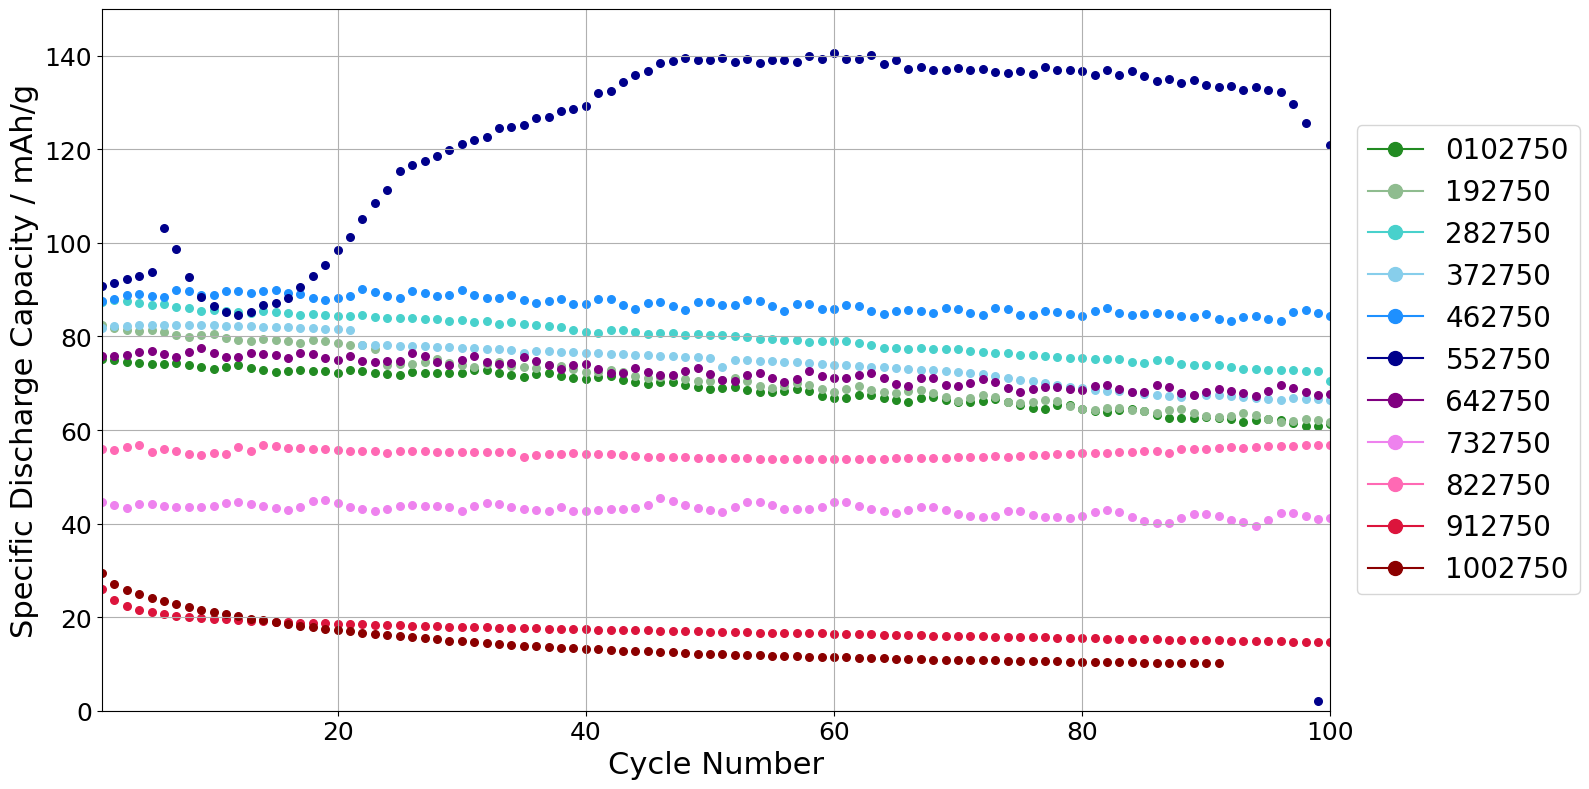

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from matplotlib.lines import Line2D 

directory = '/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/750GCD'

file_list = [filename for filename in os.listdir(directory) if filename.endswith('.xlsx')]

color_mapping = {
    '0102750': 'forestgreen',
    '192750': 'darkseagreen',
    '282750': 'mediumturquoise',
    '372750': 'skyblue',
    '462750': 'dodgerblue',
    '552750': 'darkblue',
    '642750': 'purple',
    '732750': 'violet',
    '822750': 'hotpink',
    '912750': 'crimson',
    '1002750': 'darkred',
}

custom_legend_order = ['0102750', '192750', '282750', '372750', '462750', '552750', '642750', '732750', '822750', '912750', '1002750']

all_x_values = []
all_y_values = []
labels = []

for excel_file in file_list:
    try:
        df = pd.read_excel(os.path.join(directory, excel_file))

        label_match = re.search(r'(\d+)', excel_file)
        if label_match:
            label = label_match.group(1)  
            if label in color_mapping:
                
                x_values = []
                y_values = []

               
                for col in df.columns:
                    if 'Col' in col and int(col.split('Col')[-1]) % 2 != 0:
                        # Find last non-zero and non-NaN value in col
                        non_zero_values = df[col][(df[col] != 0) & (~df[col].isnull())]
                        if not non_zero_values.empty:
                            final_value = non_zero_values.iloc[-1]
                            cycle_number = (int(col.split('Col')[-1]) + 1) / 2
                            if cycle_number <= 100:  # Only up to cycle number 98
                                x_values.append(final_value)
                                y_values.append(cycle_number)  

                all_x_values.append(x_values)
                all_y_values.append(y_values)
                labels.append(label)
            else:
                print(f"No color mapping found for label: {label}")

    except FileNotFoundError:
        print(f"File not found at: {excel_file}")

plt.figure(figsize=(16, 8))


custom_legend_handles = []
custom_legend_labels = []


for label in custom_legend_order:
    if label in labels and label in color_mapping:
        idx = labels.index(label)
        custom_legend_handles.append(Line2D([0], [0], marker='o', color=color_mapping[label], label=label, markersize=10))
        custom_legend_labels.append(label)
        plt.scatter(all_y_values[idx], all_x_values[idx], color=color_mapping[label], label=label, s=30, marker='o')  # Specify marker style as 'o'


plt.legend(handles=custom_legend_handles, labels=custom_legend_labels, loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=20)

plt.xlabel('Cycle Number', fontsize=22)
plt.ylabel('Specific Discharge Capacity / mAh/g', fontsize=22)

plt.ylim(0, 150)
plt.xlim(1, 100)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(True)

plt.tight_layout()

output_file = "/Users/harryfyjis-walker/Desktop/Part II Stuff/figures/750CapCycleNumberFinal.pdf"
plt.savefig(output_file, format='pdf')

plt.show()
